In [87]:
from pydub import AudioSegment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
angle=[]
# for i in range(len(np.arange(0,360,5))):
#     angle[i]=(str(angle[i]).rjust(3, '0'))
name = np.arange(-10,30,10)

for i in range(0,360,5):
    angle.append(str(i).rjust(3, '0'))
#  = AudioSegment.from_file("L20e"+i+"a.wav", "wav")

In [89]:
name

array([-10,   0,  10,  20])

In [90]:
df_L=pd.DataFrame(index=name,columns=angle)

In [91]:
for i in range(len(name)):
    for j in range(len(angle)):
        test= AudioSegment.from_file("elev"+str(name[i])+"/L"+str(name[i])+"e"+str(angle[j])+"a.wav", "wav")  
        list_sound = test.get_array_of_samples()
        df_L.iloc[i,j]=max(list_sound)

In [92]:
# import glob
# for i in range(len(name)):
#     list=glob.glob("./elev"+str(name[i])+"/*")
#     print(len(list))

In [93]:
df_R=pd.DataFrame(index=name,columns=angle)
for i in range(len(name)):
    for j in range(len(angle)):
        test= AudioSegment.from_file("elev"+str(name[i])+"/R"+str(name[i])+"e"+str(angle[j])+"a.wav", "wav")  
        list_sound = test.get_array_of_samples()
        df_R.iloc[i,j]=max(list_sound)

In [94]:
# df_L.to_csv("data_L.csv")
# df_R.to_csv("data_R.csv")

In [95]:
df_copy=df_R

In [96]:
type(df_copy)

pandas.core.frame.DataFrame

In [97]:
for i in range(len(df_copy)):
    for j in range(len(df_copy.columns)):
        df_copy.iloc[i,j]=max(abs(df_R.iloc[i,j]),abs(df_L.iloc[i,j]))/min(abs(df_R.iloc[i,j]),abs(df_L.iloc[i,j]))

In [98]:
# max([df_R.iloc[0.0],df_L.iloc[0,0]])
# df_L.iloc[0,0]
# x = [30, 20, 10, 40]
# max(x)
df_R.iloc[0,0] 
# df_L.iloc[0,0]

1.2231784841075795

In [99]:
df_copy

,000,005,010,015,020,025,030,035,040,045,...,310,315,320,325,330,335,340,345,350,355
-10,1.223178,1.050555,1.282639,1.487566,1.643628,1.904775,2.263807,2.740046,3.205850,4.091891,...,5.057812,4.291130,3.647098,3.352965,3.044381,2.647994,2.224265,1.685661,1.448801,1.366684
0,1.102511,1.287583,1.506078,1.707825,2.063949,2.413471,2.722163,3.133116,3.616817,3.888940,...,5.199437,4.401164,3.347946,2.569268,2.395750,2.181064,1.918324,1.684342,1.399400,1.137042
10,1.166467,1.362417,1.759950,2.150547,2.654177,3.117525,3.327869,3.414243,3.906085,4.381082,...,3.698040,4.016860,3.623861,2.800821,2.356741,2.148629,1.844539,1.557524,1.281263,1.053742
20,1.089403,1.364834,1.647703,1.943942,2.357861,2.611216,3.219362,3.621974,3.583810,3.980689,...,3.701440,3.022509,3.208851,2.927061,2.283143,2.114409,1.894078,1.570519,1.291879,1.003673


In [100]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

In [101]:
y=df_copy.iloc[1,0:int(len(df_copy.columns)/2)+1]
x=np.array([int(n) for n in list(df_copy.columns[0:(int(len(df_copy.columns)/2)+1)])]).reshape(-1, 1)
y=np.array(list(y))

In [102]:
len(y)==len(x)

True

In [103]:
df_copy

,000,005,010,015,020,025,030,035,040,045,...,310,315,320,325,330,335,340,345,350,355
-10,1.223178,1.050555,1.282639,1.487566,1.643628,1.904775,2.263807,2.740046,3.205850,4.091891,...,5.057812,4.291130,3.647098,3.352965,3.044381,2.647994,2.224265,1.685661,1.448801,1.366684
0,1.102511,1.287583,1.506078,1.707825,2.063949,2.413471,2.722163,3.133116,3.616817,3.888940,...,5.199437,4.401164,3.347946,2.569268,2.395750,2.181064,1.918324,1.684342,1.399400,1.137042
10,1.166467,1.362417,1.759950,2.150547,2.654177,3.117525,3.327869,3.414243,3.906085,4.381082,...,3.698040,4.016860,3.623861,2.800821,2.356741,2.148629,1.844539,1.557524,1.281263,1.053742
20,1.089403,1.364834,1.647703,1.943942,2.357861,2.611216,3.219362,3.621974,3.583810,3.980689,...,3.701440,3.022509,3.208851,2.927061,2.283143,2.114409,1.894078,1.570519,1.291879,1.003673


In [104]:
# 線形回帰のクラス
from sklearn.linear_model import LinearRegression
# 多項式変換のクラス
from sklearn.preprocessing import PolynomialFeatures

# 線形回帰のインスタンスを生成
lr = LinearRegression()
# 7次関数用に特徴量を変換するインスタンスを生成
pol = PolynomialFeatures(degree=2)
# Xを7次関数用に変換
X_pol = pol.fit_transform(x)
# 変換したデータを学習させる
lr.fit(X_pol, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

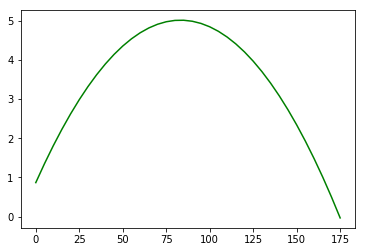

In [105]:
# -25~+25の範囲に､0.1刻みでデータ点を取る
X_plot = np.arange(0, 180, 5)
# # 対応するyを三次関数で指定
# y_plot = cubic(X_plot)
# sklearnで扱えるように､一列のベクトルに変換
X_plot = X_plot.reshape(-1, 1)
X_plot_pol = pol.fit_transform(X_plot)
# プロット用のデータのyを予測
y_plot_pol = lr.predict(X_plot_pol)
# plt.plot(X_plot, y_plot, color='gray')
# Ridge回帰によるモデルを描画
# plt.plot(X_plot, model_ridge.predict(X_plot_pol), color='red')
# 通常の多項式回帰のモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')

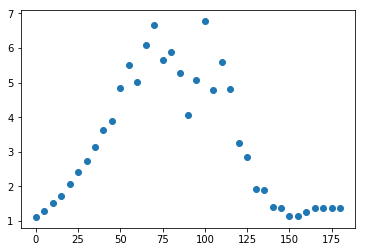

In [106]:
# データ点をプロット
plt.scatter(x, y)

In [108]:
print('coefficient = ', lr.coef_) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  [ 0.          0.0995115  -0.00059801]
intercept =  0.8690639323155622
